In [154]:
path = "../results/agnews/mistral/EvoPromptGA/seed43/benchmark_experiment_agnews_mistral_EvoPromptGA_43/57872f87172cf4ca9f4aaec3777be3bcbca7215a0d2d66cb13552ca97441300a/step_results_eval.csv"

In [155]:
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
df = pd.read_csv(path)
df

,step,timestamp,time_elapsed,score,prompt,input_tokens_meta_llm,output_tokens_meta_llm,input_tokens_downstream_llm,output_tokens_downstream_llm,test_score
0,1,2025-03-16 07:18:51.623698,262.211773,0.843333,"Given this news article, what category does it...",2704,869,560700,125989,0.846
1,1,2025-03-16 07:18:51.623698,262.211773,0.833333,"As an AI assistant, classify the news article ...",2704,869,560700,125989,0.826
2,1,2025-03-16 07:18:51.623698,262.211773,0.830000,"In our dataset of news articles, each piece mu...",2704,869,560700,125989,0.820
3,1,2025-03-16 07:18:51.623698,262.211773,0.796667,Determine the category of the news article fro...,2704,869,560700,125989,0.810
4,1,2025-03-16 07:18:51.623698,262.211773,0.786667,You are a news categorization system. Read the...,2704,869,560700,125989,0.798
...,...,...,...,...,...,...,...,...,...,...
335,34,2025-03-16 08:18:12.882340,110.199282,0.863333,Determine the category of the news article fro...,2660,990,289650,67044,0.832
336,34,2025-03-16 08:18:12.882340,110.199282,0.863333,Determine the category of the news article fro...,2660,990,289650,67044,0.832
337,34,2025-03-16 08:18:12.882340,110.199282,0.860000,Determine the category of the news article fro...,2660,990,289650,67044,0.832
338,34,2025-03-16 08:18:12.882340,110.199282,0.860000,Determine the category of the news article fro...,2660,990,289650,67044,0.832


In [157]:
df["total_tokens"] = (
    df["output_tokens_meta_llm"]
    + df["input_tokens_meta_llm"]
    + df["output_tokens_downstream_llm"]
    + df["input_tokens_downstream_llm"]
)
df["total_tokens"] = df["total_tokens"].cumsum()

In [158]:
# cum of tokens
df["output_tokens_downstream_llm_cum"] = df["output_tokens_downstream_llm"].cumsum()
df["output_tokens_meta_llm_cum"] = df["output_tokens_meta_llm"].cumsum()
df["input_tokens_downstream_llm_cum"] = df["input_tokens_downstream_llm"].cumsum()
df["input_tokens_meta_llm_cum"] = df["input_tokens_meta_llm"].cumsum()

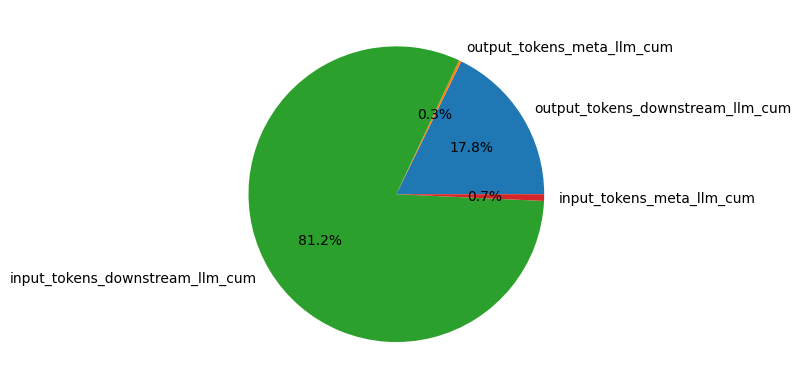

In [159]:
# plot pie
fig, ax = plt.subplots()
ax.pie(
    [
        df["output_tokens_downstream_llm_cum"].iloc[-1],
        df["output_tokens_meta_llm_cum"].iloc[-1],
        df["input_tokens_downstream_llm_cum"].iloc[-1],
        df["input_tokens_meta_llm_cum"].iloc[-1],
    ],
    labels=[
        "output_tokens_downstream_llm_cum",
        "output_tokens_meta_llm_cum",
        "input_tokens_downstream_llm_cum",
        "input_tokens_meta_llm_cum",
    ],
    autopct="%1.1f%%",
)
plt.show()

In [160]:
df["n_shots"] = df["prompt"].str.count("Input:") - 1

In [161]:
df["prompt_len"] = df["prompt"].str.len()

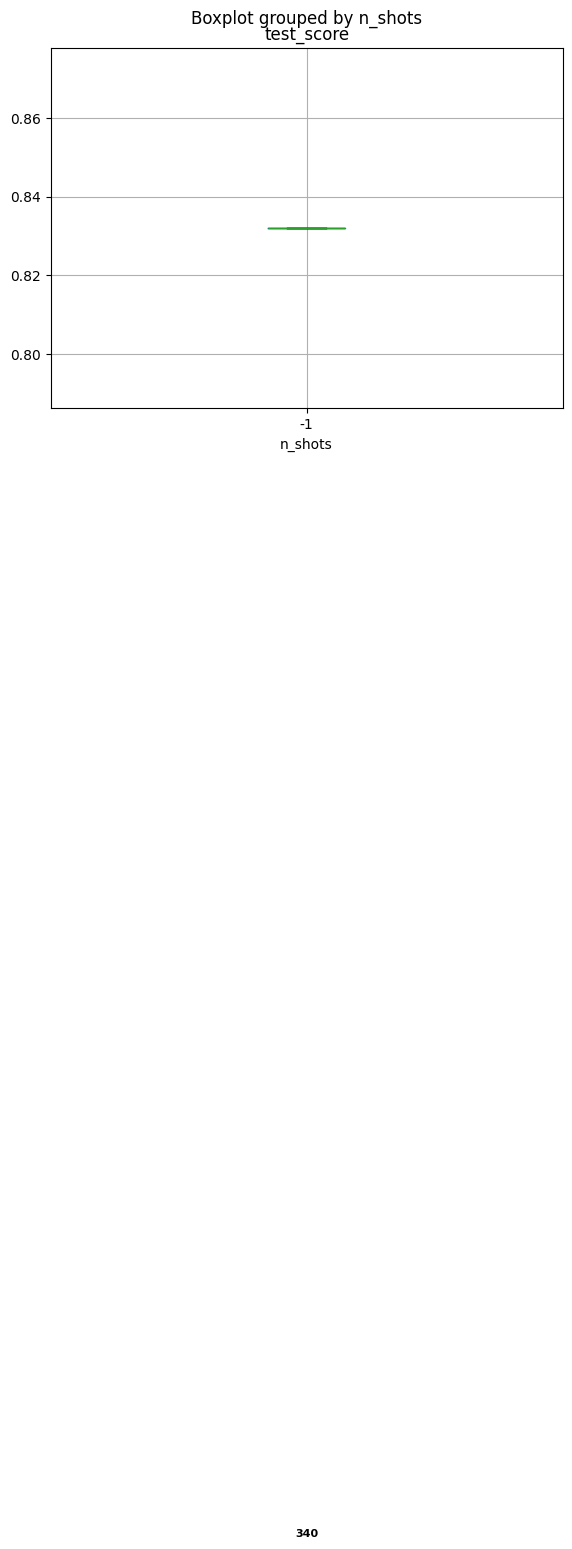

In [162]:
# correlation between number shots and score => boxplot, and give number of samples per n_shots
fig = df.boxplot(column="test_score", by="n_shots", showfliers=False)
# add number of samples per n_shots
num_samples = df.groupby("n_shots").size()
for i, n in enumerate(num_samples):
    fig.text(
        i + 1,
        0.5,
        n,
        ha="center",
        va="center",
        rotation=0,
        fontsize=8,
        color="black",
        fontweight="bold",
    )

plt.show();

In [163]:
# group df by step and get the mean of the values (ignore stings)
df_grouped = df.groupby("step", as_index=False).mean(numeric_only=True)
# df_grouped["cum_input_tokens"] = df_grouped["input_tokens_downstream_llm"].cumsum()

# join the maximum score for each step
df_grouped = df_grouped.join(
    df.groupby("step", as_index=False).max()[["step", "score"]].set_index("step"),
    on="step",
    rsuffix="_max",
)

df_grouped

,step,time_elapsed,score,input_tokens_meta_llm,output_tokens_meta_llm,input_tokens_downstream_llm,output_tokens_downstream_llm,test_score,total_tokens,output_tokens_downstream_llm_cum,output_tokens_meta_llm_cum,input_tokens_downstream_llm_cum,input_tokens_meta_llm_cum,n_shots,prompt_len,score_max
0,1,262.211773,0.786000,2704.0,869.0,560700.0,125989.0,0.7890,3796441.0,692939.5,4779.5,3083850.0,14872.0,-1.0,194.9,0.843333
1,2,99.150007,0.802000,2698.0,926.0,276450.0,44944.0,0.8040,8690219.0,1507082.0,13783.0,7127475.0,41879.0,-1.0,197.9,0.843333
2,3,95.504489,0.810000,2688.0,853.0,268950.0,40092.0,0.8118,11872006.5,1929836.0,22641.5,9850725.0,68804.0,-1.0,196.2,0.843333
3,4,104.808507,0.828000,2720.0,1003.0,291750.0,52250.0,0.8210,15191106.5,2397625.0,31996.5,12665625.0,95860.0,-1.0,224.9,0.843333
4,5,110.391649,0.837000,2747.0,1061.0,298050.0,60241.0,0.8348,18747404.5,2964075.5,42345.5,15617775.0,123208.5,-1.0,211.0,0.843333
5,6,104.037774,0.838333,2612.0,966.0,285450.0,54449.0,0.8340,22265973.5,3534629.5,52433.0,18528975.0,149936.0,-1.0,205.3,0.843333
6,7,110.357714,0.841667,2678.0,1041.0,293250.0,63878.0,0.8350,25796278.5,4130979.0,62505.5,21426375.0,176419.0,-1.0,202.1,0.860000
7,8,105.060848,0.846667,2649.0,972.0,285150.0,57790.0,0.8346,29326175.5,4736275.0,72536.0,24314325.0,203039.5,-1.0,195.7,0.863333
8,9,104.561012,0.852667,2658.0,975.0,289650.0,54000.0,0.8356,32795756.5,5293330.0,82272.5,27190575.0,229579.0,-1.0,200.4,0.863333
9,10,103.336047,0.852667,2660.0,983.0,289650.0,50591.0,0.8348,36249892.0,5814580.5,92066.5,30087075.0,256170.0,-1.0,200.4,0.863333


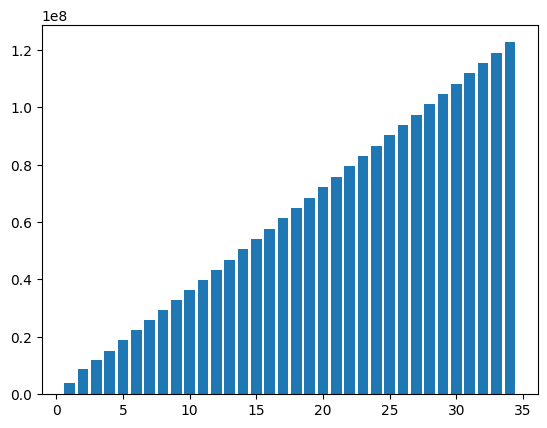

In [164]:
# plot step vs total tokens
plt.bar(df_grouped["step"], df_grouped["total_tokens"]);

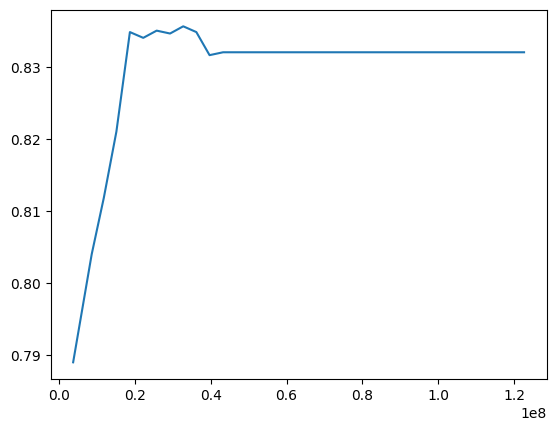

In [165]:
# plot token count vs step and adapt y-axis to min and max
column = "test_score"
plt.plot(df_grouped["total_tokens"], df_grouped[column])
plt.show();

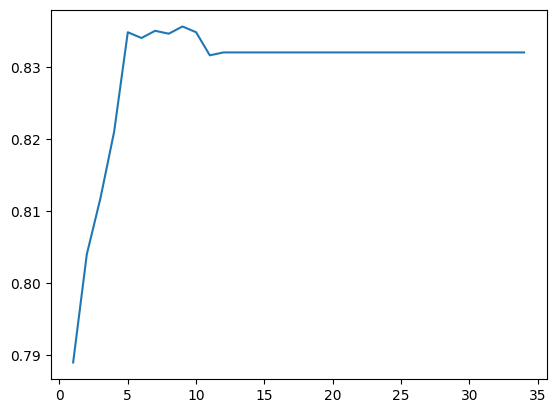

In [166]:
# plot token count vs step and adapt y-axis to min and max
column = "test_score"
plt.plot(df_grouped["step"], df_grouped[column])
plt.show();

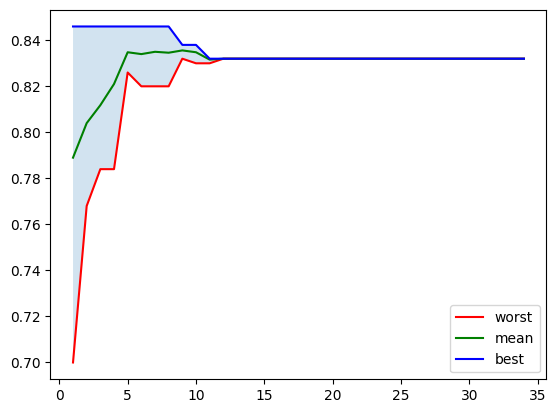

In [167]:
# x_axis => step, y_axis => worst_score, mean_score, best_score
col = "test_score"

worst_scores = df.groupby("step", as_index=False).min(numeric_only=True)[["step", col]]
mean_scores = df.groupby("step", as_index=False).mean(numeric_only=True)[["step", col]]
best_scores = df.groupby("step", as_index=False).max(numeric_only=True)[["step", col]]

plt.plot(worst_scores["step"], worst_scores[col], label="worst", color="red")
plt.plot(mean_scores["step"], mean_scores[col], label="mean", color="green")
plt.plot(best_scores["step"], best_scores[col], label="best", color="blue")
# fill area between lines
plt.fill_between(mean_scores["step"], worst_scores[col], best_scores[col], alpha=0.2)
plt.legend()
plt.show();

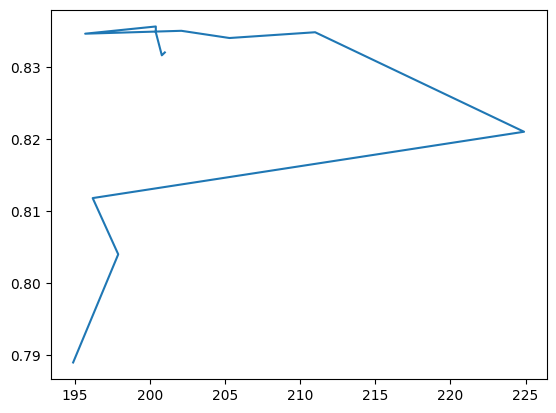

In [168]:
# plot score vs prompt length
plt.plot(df_grouped["prompt_len"], df_grouped["test_score"])
plt.show();

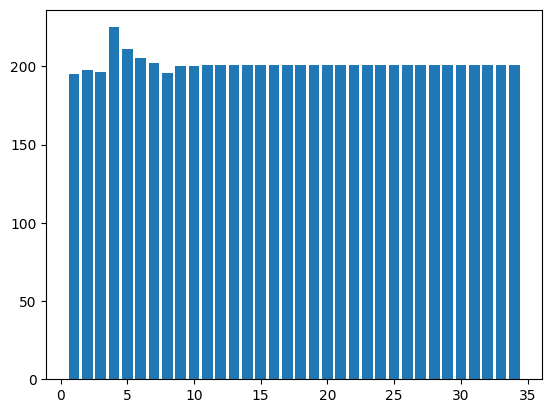

In [169]:
# prompt length vs step
plt.bar(df_grouped["step"], df_grouped["prompt_len"]);

### Analyze best prompts per step

In [170]:
df_best = df.groupby("step").apply(lambda x: x.nlargest(1, "score")).reset_index(drop=True)
# df_best

C:\Users\tzehl\AppData\Local\Temp\ipykernel_4056\373190983.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_best = df.groupby("step").apply(lambda x: x.nlargest(1, "score")).reset_index(drop=True)


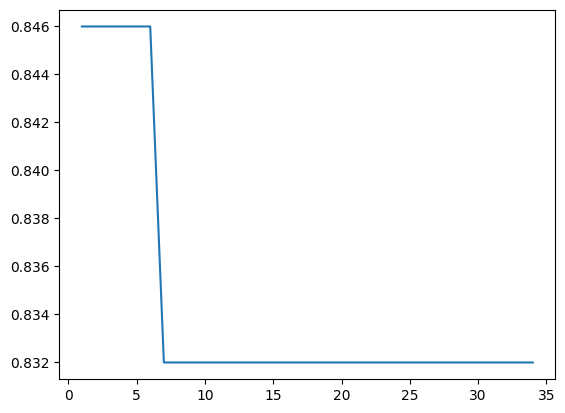

In [171]:
# max a line plot of the best score vs step
plt.plot(df_best["step"], df_best["test_score"]);

## Analyze Racing

In [172]:
from pprint import pprint as pp

p = lambda x: (pp(x.replace("\r", ""), compact=True, width=200))

In [173]:
df["test_score"].nlargest(10)

0     0.846
10    0.846
20    0.846
30    0.846
40    0.846
50    0.846
62    0.846
75    0.846
43    0.840
55    0.840
Name: test_score, dtype: float64

In [174]:
# best prompt
col = "test_score"
k_best = 1

best_prompt = df[df[col] == df[col].nlargest(k_best).values[k_best - 1]]
print("unique?", len(best_prompt["prompt"].unique()))
print("number of shots: ", best_prompt["n_shots"].values[0])
print("score: ", best_prompt[col].values[0])
print("first occurence: ", best_prompt["step"].values[0])
print("last occurence: ", best_prompt["step"].values[-1])
print("last train score: ", best_prompt["score"].values[-1].round(2))

p(best_prompt["prompt"].unique()[0])

unique? 1
number of shots:  -1
score:  0.846
first occurence:  1
last occurence:  8
last train score:  0.84
'Given this news article, what category does it fall under? Select from World, Sports, Business, or Sci/Tech. Ensure your answer is formatted as <final_answer> category </final_answer>.'


In [175]:
# load the prompt scores per block
path = path.replace("step_results_eval", "prompt_scores")

df_blocks = pd.read_csv(path)
# round all numbers to 2 decimal places
df_blocks = df_blocks.round(2)

df_blocks

FileNotFoundError: [Errno 2] No such file or directory: '../results/agnews/mistral/EvoPromptGA/seed43/benchmark_experiment_agnews_mistral_EvoPromptGA_43/57872f87172cf4ca9f4aaec3777be3bcbca7215a0d2d66cb13552ca97441300a/prompt_scores.csv'

In [ ]:
# get number of blocks per prompt by counting non nans per columns
n_blocks = df_blocks.count(axis=1) - 1

In [ ]:
n_blocks

0       1
1       2
2      10
3       1
4      10
       ..
115    10
116    10
117     1
118    10
119     1
Length: 120, dtype: int64

In [ ]:
df_count = pd.DataFrame({"n_blocks": n_blocks.values, "prompt": df_blocks["Unnamed: 0"]})

In [ ]:
df_count["n_blocks"].value_counts()

n_blocks
10    45
1     43
2     11
3      5
5      4
7      4
8      3
4      3
6      2
Name: count, dtype: int64

In [ ]:
# join with df
df_count = df_count.join(df.set_index("prompt"), on="prompt", how="left", lsuffix="_rrr")

# bin by test_score
df_count["test_score_bin"] = pd.cut(df_count["test_score"], bins=5)

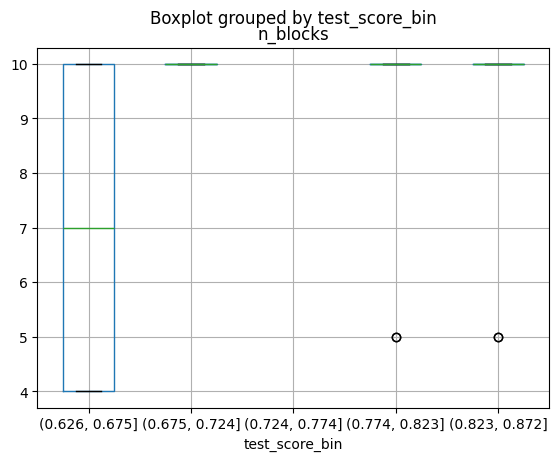

In [ ]:
# evals vs score => boxplot
df_count.boxplot(column="n_blocks", by="test_score_bin");

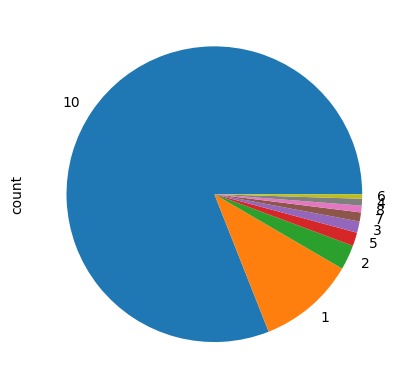

In [ ]:
# pie chart of number of blocks per prompt
df_count["n_blocks"].value_counts().plot.pie();

In [ ]:
# clculate the number of saved evaluations, so how many differ by how much from 10 in n_blocks
df_count["n_blocks_diff"] = abs(df_count["n_blocks"] - 10)
n_blocks_diff_times_n = (
    df_count["n_blocks_diff"].value_counts() * df_count["n_blocks_diff"].value_counts().index
)
n_blocks_diff_times_n.sum()

584

In [ ]:
# total number of evaluations
df_count["n_blocks"].sum()

3466

In [ ]:
# tokens saved
(n_blocks_diff_times_n.sum()) / (n_blocks_diff_times_n.sum() + df_count["n_blocks"].sum())

0.14419753086419754

In [ ]:
df_count["n_blocks"].describe()

count    405.000000
mean       8.558025
std        3.118091
min        1.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: n_blocks, dtype: float64

In [ ]:
df

,step,timestamp,time_elapsed,score,prompt,input_tokens_meta_llm,output_tokens_meta_llm,input_tokens_downstream_llm,output_tokens_downstream_llm,test_score,total_tokens,output_tokens_downstream_llm_cum,output_tokens_meta_llm_cum,input_tokens_downstream_llm_cum,input_tokens_meta_llm_cum,n_shots,prompt_len
0,1,2025-03-16 07:20:40.966309,283.655929,0.861515,We need your assistance in developing a news c...,1420,544,754007,42439,0.864,798410,42439,544,754007,1420,6,2220
1,1,2025-03-16 07:20:40.966309,283.655929,0.851288,Classify this news article into one of these c...,1420,544,754007,42439,0.844,1596820,84878,1088,1508014,2840,3,900
2,1,2025-03-16 07:20:40.966309,283.655929,0.832273,Analyze the provided news text and determine i...,1420,544,754007,42439,0.846,2395230,127317,1632,2262021,4260,6,2031
3,1,2025-03-16 07:20:40.966309,283.655929,0.825152,Please read this news article carefully and as...,1420,544,754007,42439,0.814,3193640,169756,2176,3016028,5680,6,1999
4,1,2025-03-16 07:20:40.966309,283.655929,0.821288,Examine the following news text and identify w...,1420,544,754007,42439,0.854,3992050,212195,2720,3770035,7100,7,2460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,27,2025-03-16 08:09:59.886166,146.997458,0.810682,I need to categorize news articles into four d...,2027,1005,490942,12677,0.856,124278532,3773176,379704,119425664,699988,5,1901
320,27,2025-03-16 08:09:59.886166,146.997458,0.809091,"As a helpful AI assistant, you need to analyze...",2027,1005,490942,12677,0.856,124785183,3785853,380709,119916606,702015,7,2633
321,27,2025-03-16 08:09:59.886166,146.997458,0.807500,"As a helpful AI assistant, please analyze the ...",2027,1005,490942,12677,0.838,125291834,3798530,381714,120407548,704042,2,1187
322,27,2025-03-16 08:09:59.886166,146.997458,0.806818,I need to classify news articles into four dis...,2027,1005,490942,12677,0.868,125798485,3811207,382719,120898490,706069,8,2528
